In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Reamostragem
1 - Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

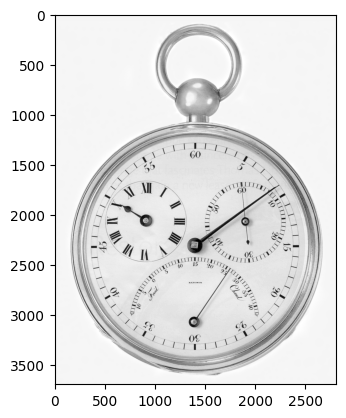

In [2]:
img_relogio = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_relogio, cmap='gray', vmin=0, vmax=255)

In [3]:
print('Tamanho da imagem : ',img_relogio.shape)

Tamanho da imagem :  (3692, 2812)


In [4]:
img_relogio

array([[245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       ...,
       [245, 245, 245, ..., 246, 246, 246],
       [245, 245, 245, ..., 246, 246, 246],
       [245, 245, 245, ..., 246, 246, 246]], dtype=uint8)

Tamanho da imagem :  (443, 337)


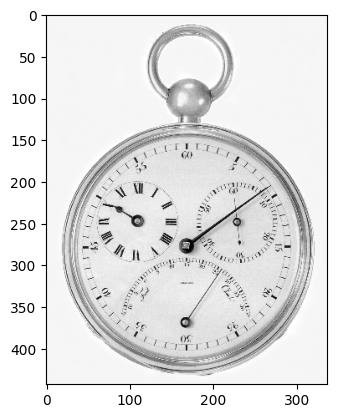

In [24]:
entrada_usuario_dpi = input('Digite a quantidade de DPI que deseja: ')

if entrada_usuario_dpi.replace(".", "", 1).isdigit():
    valor_numerico_dpi = float(entrada_usuario_dpi)
    proporcao_dpi = valor_numerico_dpi/1250
    nova_altura = int(img_relogio.shape[0] * proporcao_dpi)
    nova_largura = int(img_relogio.shape[1] * proporcao_dpi)
    new_img_relogio = np.zeros((nova_altura, nova_largura))

    for i in range(nova_altura):
        for j in range(nova_largura):
            original_i = int(i / proporcao_dpi)
            original_j = int(j / proporcao_dpi)
            new_img_relogio[i, j] = img_relogio[original_i, original_j]
            
    plt.imshow(new_img_relogio, cmap='gray', vmin=0, vmax=255)
    print('Tamanho da imagem : ',new_img_relogio.shape)
    
else:
    print("Erro: Isso não é um valor numérico válido.")


# Quantização
2 - Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão.

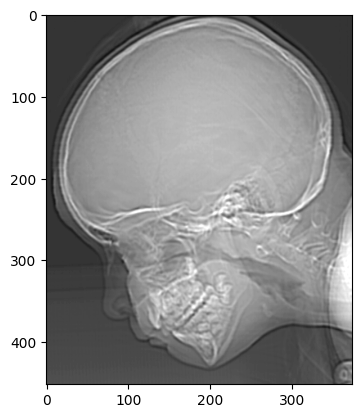

In [25]:
img_cranio = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_cranio, cmap='gray', vmin=0, vmax=255)

In [27]:
print('Tamanho da imagem : ',img_cranio.shape)

Tamanho da imagem :  (452, 374)


In [43]:
min_val = img_cranio.min(axis=(0, 1))
max_val = img_cranio.max(axis=(0, 1))

print(f'Valor mínimo das cores (B, G, R): {min_val}')
print(f'Valor máximo das cores (B, G, R): {max_val}')

Valor mínimo das cores (B, G, R): 12
Valor máximo das cores (B, G, R): 255


In [28]:
img_cranio

array([[ 52,  52,  52, ...,  52,  50,  52],
       [ 52,  52,  52, ...,  52,  50,  52],
       [ 52,  52,  52, ...,  52,  50,  50],
       ...,
       [ 79,  79,  79, ...,  97, 112, 131],
       [ 79,  81,  79, ..., 113, 122, 132],
       [ 79,  81,  81, ..., 131, 129, 127]], dtype=uint8)

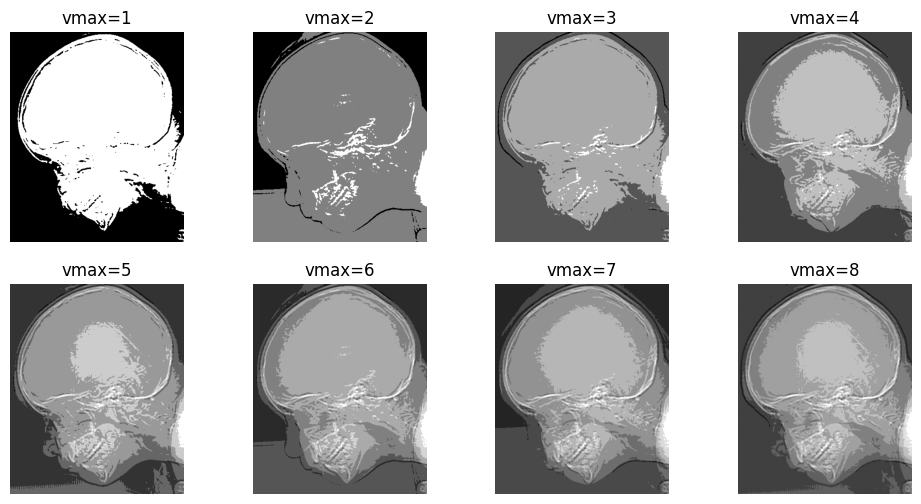

In [44]:
plt.figure(figsize=(12, 6))

max_val = img_cranio.max(axis=(0, 1))

for i in range(1,9):
    proporcao_bit = max_val / i
    new_img_cranio = np.round(img_cranio / proporcao_bit)
    
    plt.subplot(2, 4, i)  
    plt.imshow(new_img_cranio, cmap='gray', vmin=0, vmax=i)
    plt.title(f'vmax={i}')
    plt.axis('off')